<div style="font-family: 'Source Code Pro'; font-size: 24px;">

## **Dispositivos de Entrada y Salida**

Toda CPU necesita una interfaz con el mundo real. Esta interfaz puede ser con un ser humano, en cuyo caso podríamos pensar en monitor, teclado y/o mouse, o no. Imaginen una computadora que corre un software de modelos climáticos, cuyo objetivo es predecir el clima en una zona. Seguramente necesitaría datos de anemómetros, higrómetros, termómetros, y datos satelitales. Podría emitir la salida imprimiendo un reporte.

Toda pieza de hardware conectada al computador que le permite obtener datos del mundo exterior lo llamamos “Dispositivo de Entrada” y los que presentan datos al mundo exterior “Dispositivo de Salida”. Son componentes tan importantes que forman parte de las primeras computadoras que se han diseñado, tal como vimos al analizar la arquitectura propuesta por Von Neumann.

Los dispositivos de entrada y salida (E/S) son fundamentales en cualquier sistema informático, ya que permiten la interacción entre la computadora y el entorno externo. Como mencionaste, los dispositivos de entrada son aquellos que permiten al computador recibir datos del mundo exterior. Ejemplos típicos incluyen el teclado, el mouse, y dispositivos más especializados como sensores (anemómetros, higrómetros, termómetros, etc.) que podrían ser utilizados en sistemas de modelado climático.

Por otro lado, los dispositivos de salida son los que permiten que la computadora presente información al usuario o al entorno. Ejemplos comunes incluyen monitores y impresoras, pero en aplicaciones más especializadas, podrían incluir alarmas, señales luminosas, o incluso dispositivos de retroalimentación táctil.

En el contexto de la arquitectura de Von Neumann, que es un modelo de diseño básico para la mayoría de las computadoras, los dispositivos de E/S son esenciales. Este modelo define que una computadora debe tener una unidad de procesamiento central (CPU), memoria (RAM), y dispositivos de E/S. La CPU realiza cálculos y toma decisiones, la memoria almacena datos e instrucciones, y los dispositivos de E/S permiten la comunicación con el mundo exterior. Por lo tanto, los dispositivos de E/S son tan importantes como los componentes internos de la computadora, ya que facilitan la interacción entre el sistema informático y el entorno real, ya sea para recibir datos (entrada) o para mostrar resultados (salida).

El manejo de dispositivos de entrada y salida mediante posiciones de memoria es un enfoque común en la arquitectura de computadoras. En este modelo, el procesador interactúa con los dispositivos de E/S como si fueran ubicaciones de memoria específicas, lo que simplifica el diseño del hardware y el software del sistema.

## **Ejemplos Detallados:**

**Teclado:**

- Cuando una tecla es presionada, el teclado genera un código numérico conocido como "scan-code" que representa la tecla específica.

- Este "scan-code" se coloca en una dirección de memoria designada para el teclado.

- El procesador revisa periódicamente esta posición de memoria para determinar si una tecla ha sido presionada y cuál es. Este método se conoce como "polling" o sondeo.

**Monitor:**

- Un monitor puede ser conceptualizado como una cuadrícula de miles de píxeles. Cada píxel se define por un conjunto de tres valores que representan los colores primarios: rojo, verde y azul (RGB).

- Estos valores de color se almacenan en posiciones consecutivas de memoria. Cuando el procesador necesita cambiar el color de un píxel específico, simplemente escribe nuevos valores RGB en las posiciones de memoria correspondientes.

- Cada cambio en la memoria es inmediatamente reflejado en la pantalla, haciendo que el píxel cambie de color.

## **Ineficiencia del Polling**

El método de "polling", donde el procesador verifica constantemente las posiciones de memoria de los dispositivos de E/S, puede ser ineficiente. Esto se debe a que el procesador consume tiempo de ejecución valioso revisando repetidamente estas posiciones de memoria, incluso cuando no hay eventos nuevos.

Para mitigar esta ineficiencia, se utilizan técnicas como las interrupciones:

- **Interrupciones:** En lugar de que el procesador esté constantemente consultando el estado de un dispositivo de E/S, el dispositivo envía una señal de interrupción al procesador cuando ocurre un evento (por ejemplo, cuando se presiona una tecla).

- Cuando se recibe una interrupción, el procesador pausa su ejecución actual, guarda su estado, y ejecuta un "manejador de interrupción" que se encarga de procesar el evento de E/S.

- Este enfoque libera al procesador de la necesidad de monitorear continuamente los dispositivos de E/S, permitiendo que se enfoque en otras tareas hasta que una interrupción requiera su atención.</div>

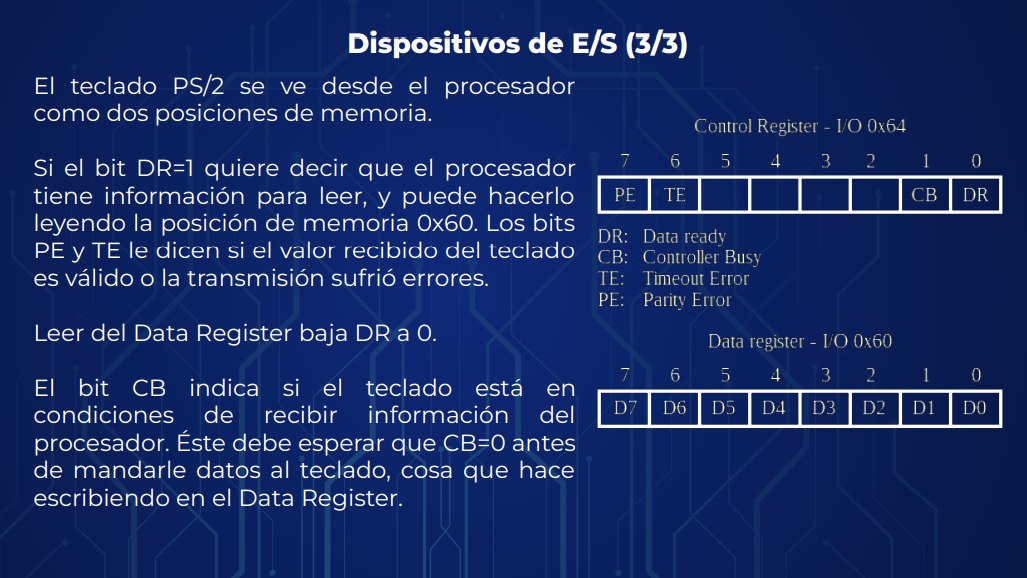

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen describe cómo se manejan los dispositivos de entrada/salida (E/S), específicamente un teclado PS/2, desde la perspectiva del procesador. Vamos a desglosar cada parte en detalle:

## **Interfaz del Teclado PS/2 con el Procesador**

El teclado PS/2 se gestiona mediante dos posiciones de memoria en el espacio de E/S del procesador:

- 1- Control Register (Registro de Control) - Dirección de E/S 0x64
- 2- Data Register (Registro de Datos) - Dirección de E/S 0x60

<u>**Control Register (0x64)**</u>

El Control Register tiene varios bits importantes que indican el estado del teclado o del controlador:

- DR (Data Ready) - Bit 0: Este bit indica si hay datos listos para ser leídos por el procesador. Si DR = 1, el procesador puede leer un valor del Data Register (0x60). Esto ocurre cuando el teclado ha enviado un "scan-code" tras presionar una tecla. Al leer el Data Register, este bit se resetea a 0 (DR = 0), indicando que el dato ha sido procesado.

- CB (Controller Busy) - Bit 1: Este bit indica si el teclado o el controlador están ocupados. Si CB = 1, el teclado está ocupado procesando una operación o esperando completar una transmisión. El procesador debe esperar hasta que CB = 0 antes de enviar nuevos datos al teclado a través del Data Register.

- PE (Parity Error) - Bit 7: Este bit indica si hubo un error de paridad en la transmisión de datos desde el teclado. Un error de paridad significa que los datos recibidos no coinciden con la paridad esperada, sugiriendo una posible corrupción de datos.

- TE (Timeout Error) - Bit 6: Este bit señala un error de tiempo de espera, indicando que la operación de transmisión o recepción ha tomado demasiado tiempo y no se completó como se esperaba.

<u>**Data Register (0x60)**</u>

El Data Register es utilizado para dos propósitos:

- Leer datos desde el teclado: Cuando el teclado envía un "scan-code" (un valor que representa una tecla presionada), este código se almacena en el Data Register. El procesador puede leer este registro cuando DR = 1 en el Control Register.

- Escribir datos al teclado: El procesador también puede enviar datos al teclado escribiendo en el Data Register, pero debe esperar a que el bit CB = 0 en el Control Register para asegurarse de que el teclado esté listo para recibir datos.

## **Funcionamiento General**

1- Lectura desde el Teclado:

- Cuando una tecla es presionada, el teclado PS/2 genera un "scan-code" y lo coloca en el Data Register (0x60).

- El bit DR en el Control Register (0x64) se establece a 1, indicando que hay datos listos para ser leídos.

- El procesador verifica periódicamente el bit DR. Cuando detecta que DR = 1, lee el Data Register (0x60) para obtener el "scan-code".

- Después de leer el registro, DR se restablece a 0, indicando que los datos han sido leídos y no hay más datos disponibles hasta que se presione otra tecla.

2- Escritura al Teclado:

- Antes de enviar datos al teclado, el procesador verifica que el bit CB en el Control Register (0x64) esté a 0 (CB = 0), asegurándose de que el teclado esté listo para recibir datos.

- Una vez que CB = 0, el procesador puede escribir datos en el Data Register (0x60).

- El teclado recibe los datos y ejecuta la acción correspondiente, como ajustar su configuración o encender/apagar las luces de bloqueo (Caps Lock, Num Lock, etc.).

**Resumen**

La interacción entre el teclado PS/2 y el procesador se gestiona mediante dos registros de memoria. El Control Register indica el estado del teclado y permite al procesador determinar cuándo leer o escribir datos. El Data Register es el medio a través del cual se transfieren datos entre el teclado y el procesador. Este diseño permite una comunicación eficiente y controlada entre el teclado y el sistema, asegurando que los datos se transfieran sin errores ni conflictos.</div>

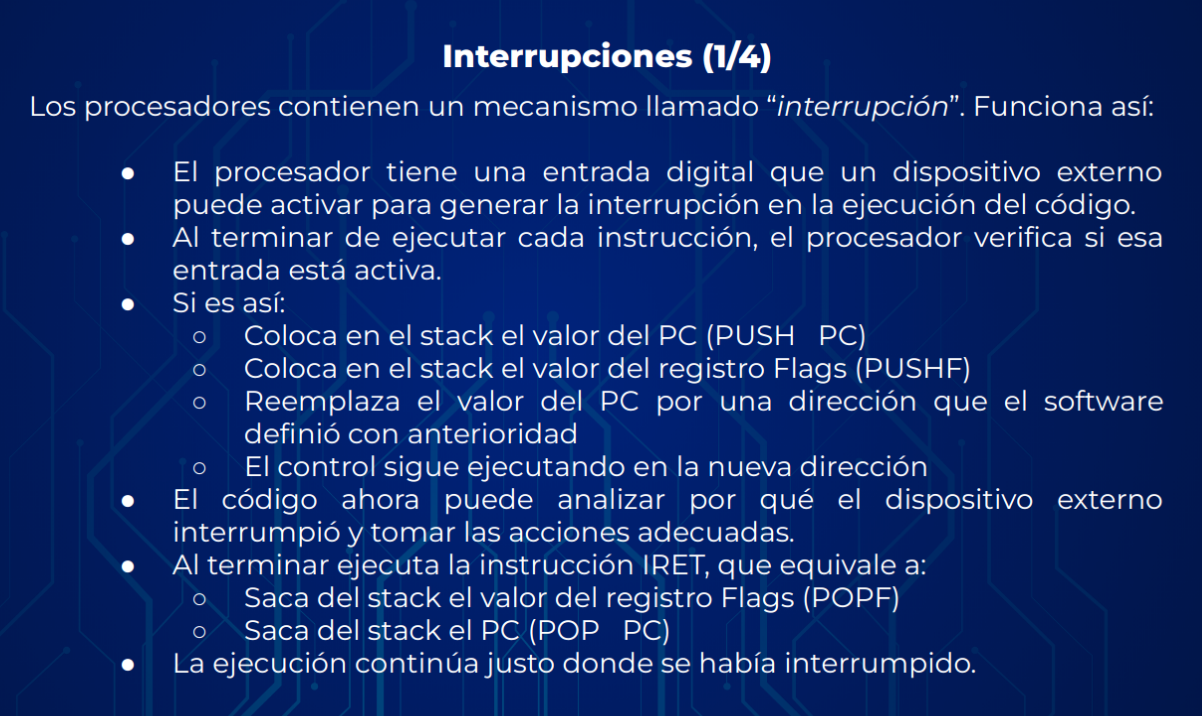

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen explica cómo funciona el mecanismo de interrupciones en los procesadores. Las interrupciones son señales enviadas al procesador por hardware o software para indicar que un evento necesita atención inmediata. Son fundamentales para manejar eventos asíncronos, como la entrada de teclado, la llegada de datos desde la red, o errores de hardware.

## **Desglose del Proceso de Interrupción:**

1- **Entrada Digital para Interrupciones:**

- El procesador tiene una "entrada digital" que puede ser activada por un dispositivo externo (por ejemplo, un teclado, un ratón, un disco duro, etc.) para solicitar la atención del procesador.

- Esta entrada genera una señal de interrupción que se detecta en el procesador.

2- **Verificación de Interrupciones:**

- Después de ejecutar cada instrucción, el procesador verifica si hay una solicitud de interrupción activa.

- Esto asegura que el procesador puede responder rápidamente a eventos importantes sin tener que esperar a que un ciclo completo de instrucciones se complete.

3- **Si una Interrupción Está Activa:**

- Guardar el Contexto Actual:
    
    - El procesador "empuja" o guarda el valor actual del contador de programa (PC) en la pila (stack). Esto se hace usando la instrucción PUSH PC. El PC guarda la dirección de memoria de la próxima instrucción a ejecutar, por lo que guardar este valor es crucial para regresar a la ejecución normal después de manejar la interrupción.

    - También guarda el valor de los registros de flags (indicadores de estado) en la pila con la instrucción PUSHF. Los flags contienen información de estado sobre la CPU (como el resultado de la última operación aritmética, el estado de interrupciones, etc.).

- Reemplazo del Contador de Programa:

    - El procesador carga el contador de programa (PC) con una nueva dirección que apunta a una "rutina de servicio de interrupción" (ISR). Esta rutina es un bloque de código previamente definido que maneja la interrupción específica.

- Ejecutar la Rutina de Servicio de Interrupción:

    - A partir de este punto, el procesador comienza a ejecutar las instrucciones de la rutina de servicio de interrupción en la nueva dirección.

4- **Ejecutando el Código de la Interrupción:**

- El código en la rutina de servicio de interrupción puede analizar la causa de la interrupción, manejarla adecuadamente (por ejemplo, leer un carácter del teclado, procesar datos de red, manejar un error de hardware, etc.), y ejecutar cualquier acción necesaria.

5- **Retorno del Manejador de Interrupción:**

- Una vez que la rutina de servicio de interrupción ha terminado de manejar la interrupción, se ejecuta la instrucción IRET (Interrupt Return), que hace lo siguiente:

    - Restaurar los Flags: La instrucción POPF saca de la pila el valor guardado del registro de flags, restaurando el estado de la CPU al momento justo antes de la interrupción.

    - Restaurar el Contador de Programa: La instrucción POP PC saca de la pila el valor guardado del contador de programa, permitiendo que el procesador continúe la ejecución normal justo donde se detuvo.

6- **Reanudar Ejecución Normal:**

- Con el PC y los flags restaurados, el procesador continúa ejecutando instrucciones desde el punto donde se había interrumpido, como si nada hubiera pasado.

**Importancia de las Interrupciones**

Las interrupciones son esenciales para el funcionamiento eficiente de un sistema operativo y para permitir que una computadora responda rápidamente a eventos externos. En lugar de que el procesador esté ocupado revisando constantemente los dispositivos de E/S para detectar cambios (un método conocido como "polling"), las interrupciones permiten que el procesador trabaje en otras tareas hasta que realmente se necesite su atención, optimizando así el uso del tiempo de la CPU.</div>

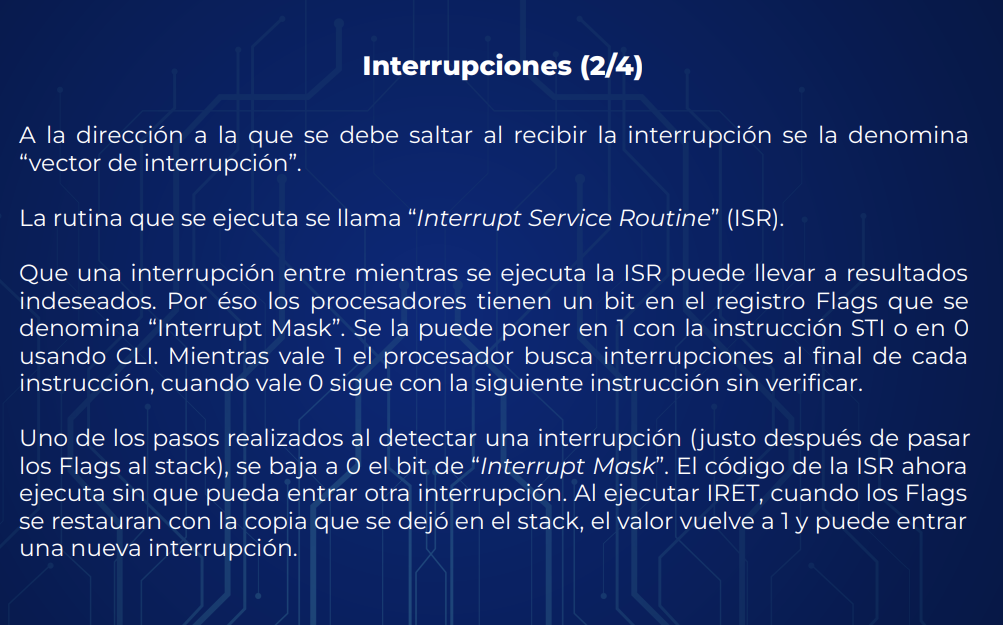


<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen proporciona más detalles sobre cómo funcionan las interrupciones en un procesador, introduciendo conceptos como el vector de interrupción, la rutina de servicio de interrupción (ISR) y el máscara de interrupciones. Vamos a explicar cada uno de estos conceptos en detalle:

1-  **Vector de Interrupción**

- Definición: El vector de interrupción es una dirección de memoria específica a la cual el procesador debe "saltar" cuando se detecta una interrupción. Es decir, cuando se produce una interrupción, el procesador necesita saber dónde comenzar a ejecutar el código para manejar esa interrupción, y esa dirección se conoce como el vector de interrupción.

- Función: Este vector apunta a la Interrupt Service Routine (ISR), que es el bloque de código encargado de manejar la interrupción específica. Cada tipo de interrupción tiene su propio vector que apunta a su respectiva ISR.

2- **Interrupt Service Routine (ISR)**

- Definición: La Interrupt Service Routine (ISR) es la rutina que se ejecuta cuando se recibe una interrupción. Es un pequeño programa de software que realiza las acciones necesarias para responder a la interrupción, como leer un dato de entrada, procesar información o manejar un error.

- Función: El objetivo principal de la ISR es manejar rápidamente la interrupción para que el sistema pueda volver a su funcionamiento normal lo antes posible. Las ISRs deben ser rápidas y eficientes para minimizar el tiempo en que el sistema está interrumpido.

3- **Máscara de Interrupciones (Interrupt Mask)**

- Definición: La máscara de interrupciones es un bit específico en el registro de flags del procesador que controla si las interrupciones están habilitadas o deshabilitadas. Este bit puede ser manipulado mediante instrucciones del procesador:

    - STI (Set Interrupt Flag) se utiliza para habilitar las interrupciones (establecer el bit a 1).

    - CLI (Clear Interrupt Flag) se utiliza para deshabilitar las interrupciones (establecer el bit a 0).

- Función:

    - Cuando el bit de la máscara de interrupciones está en 1, el procesador revisa regularmente si hay interrupciones activas y está listo para interrumpir el flujo normal de ejecución para manejar eventos asíncronos.

    - Cuando el bit está en 0, el procesador ignora las solicitudes de interrupción, lo que significa que las interrupciones no serán procesadas hasta que se re-habiliten.

4- **Manejo de Interrupciones Durante la Ejecución de una ISR**

- Problema: Si una nueva interrupción ocurre mientras una ISR ya está en ejecución, podría llevar a comportamientos inesperados o resultados indeseados, como datos corrompidos o conflictos entre diferentes dispositivos de hardware que intentan usar el mismo recurso.

- Solución con Máscara de Interrupciones:

    - Para evitar este problema, uno de los primeros pasos que se realiza al detectar una interrupción es bajar a 0 el bit de la máscara de interrupciones (justo después de guardar los flags en el stack).

    - Esto asegura que, mientras se está ejecutando la ISR, no puede entrar otra interrupción, evitando así posibles conflictos o errores.

    - Una vez que la ISR ha terminado de ejecutar y está lista para devolver el control al programa principal, se utiliza la instrucción IRET para restaurar los flags y el contador de programa desde la pila. Al hacer esto, el bit de la máscara de interrupciones se restaura a su estado original, permitiendo nuevamente la entrada de interrupciones.

**Resumen**

La imagen describe un enfoque sofisticado para manejar interrupciones en los procesadores modernos, asegurando una respuesta eficiente a eventos externos mientras se minimizan los posibles conflictos y errores que pueden surgir de múltiples interrupciones. El uso de vectores de interrupción, ISRs, y máscaras de interrupciones permite a los sistemas operativos gestionar de manera efectiva las interrupciones y mantener un rendimiento óptimo del sistema.</div>

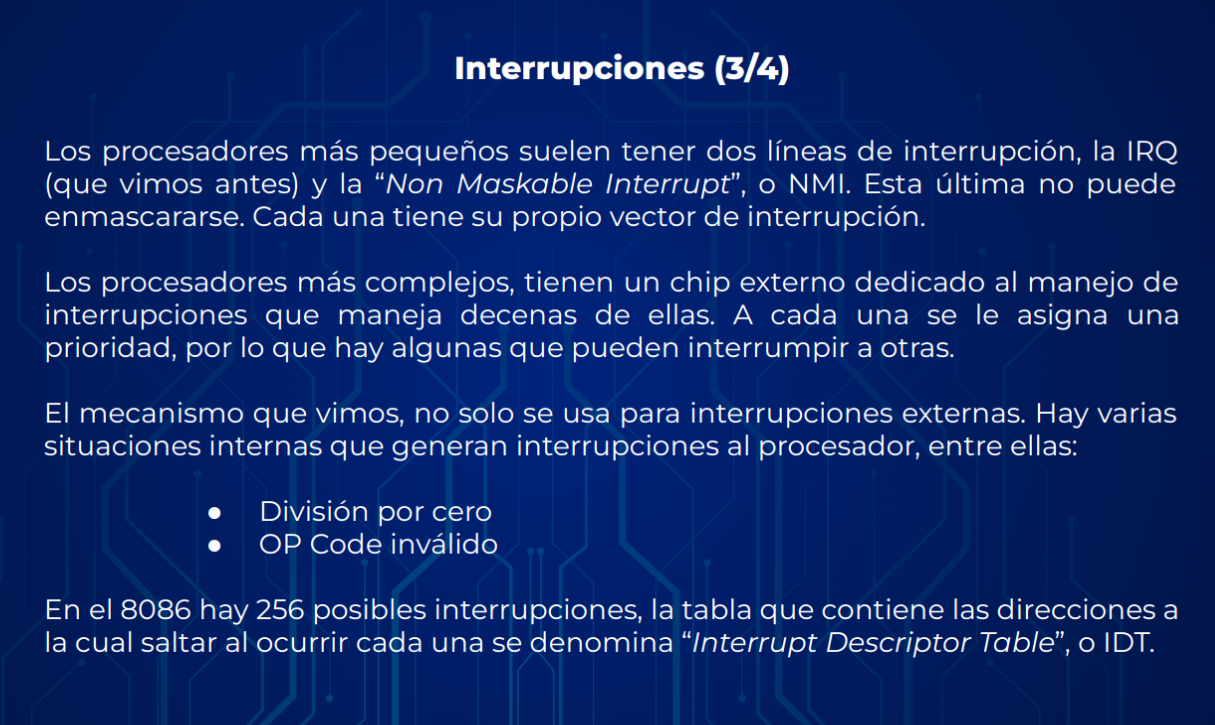

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen proporciona más detalles sobre las interrupciones, incluyendo diferentes tipos de interrupciones y cómo se manejan en procesadores de diferentes capacidades. Vamos a desglosar estos conceptos:

1- **Tipos de Interrupciones en Procesadores**

Los procesadores pueden manejar diferentes tipos de interrupciones, las cuales se categorizan en dos grandes grupos:

- IRQ (Interrupt Request): Estas son las interrupciones que hemos discutido anteriormente, que pueden ser enmascaradas o ignoradas por el procesador dependiendo del estado de la máscara de interrupciones. Estas interrupciones son usadas comúnmente para manejar dispositivos de hardware que necesitan atención del procesador, como teclados, discos duros, tarjetas de red, etc.

- NMI (Non-Maskable Interrupt): Este tipo de interrupción no puede ser enmascarada o ignorada. Las NMIs se utilizan para eventos críticos que requieren la atención inmediata del procesador y que no pueden ser retrasados. Un ejemplo típico de una NMI es un error de hardware grave, como una falla de memoria o de fuente de alimentación. Debido a su importancia, las NMIs tienen su propio vector de interrupción para asegurar que siempre sean manejadas de manera prioritaria.

2- **Manejo de Interrupciones en Procesadores Más Complejos**

- En procesadores más avanzados y complejos, existe un componente especializado conocido como controlador de interrupciones programable (PIC) o más modernamente, controlador de interrupciones avanzado (APIC), que es un chip dedicado para manejar múltiples interrupciones. Este chip permite manejar docenas de interrupciones simultáneamente y puede asignar diferentes niveles de prioridad a cada interrupción.

- Prioridades de Interrupción: Debido a la capacidad de manejar múltiples interrupciones, el sistema puede asignar prioridades a diferentes tipos de interrupciones. Esto significa que algunas interrupciones pueden "interrumpir" a otras, permitiendo que las más críticas sean atendidas primero. Por ejemplo, una interrupción de emergencia médica podría tener mayor prioridad que una interrupción de entrada de teclado.

3- **Interrupciones Internas del Procesador**

El mecanismo de interrupciones no solo se utiliza para manejar interrupciones externas (como las que vienen de dispositivos de hardware), sino también para manejar interrupciones internas que surgen dentro del propio procesador debido a condiciones excepcionales o errores de software:

- División por Cero: Cuando una operación de división en el procesador intenta dividir por cero, se genera una interrupción interna. Esto es necesario porque dividir por cero es una operación indefinida y puede causar errores en el programa si no se maneja adecuadamente.

- OP Code Inválido: Si el procesador intenta ejecutar una instrucción que no reconoce (un código de operación inválido), genera una interrupción interna. Esto puede ocurrir si hay un error en el software o si hay corrupción en la memoria.

4- **Interrupt Descriptor Table (IDT)**

- En procesadores como el Intel 8086, existen múltiples posibles interrupciones (256 en total en este caso). Para gestionar estas interrupciones de manera eficiente, el procesador utiliza una tabla conocida como la Interrupt Descriptor Table (IDT).

- Función de la IDT: La IDT contiene las direcciones de memoria (vectores de interrupción) a las cuales el procesador debe saltar cuando ocurre una interrupción específica. Cada entrada en la IDT corresponde a una interrupción específica y apunta a la rutina de servicio de interrupción (ISR) adecuada para manejar esa interrupción.

**Resumen**

En resumen, los procesadores utilizan un sistema de interrupciones sofisticado para manejar tanto eventos externos como condiciones internas que requieren atención inmediata. Este sistema permite que el procesador responda rápidamente a eventos importantes y mantenga la operación del sistema de manera eficiente y segura. La capacidad de manejar múltiples interrupciones, asignar prioridades y gestionar errores internos es fundamental para el funcionamiento de sistemas modernos y complejos.
</div>

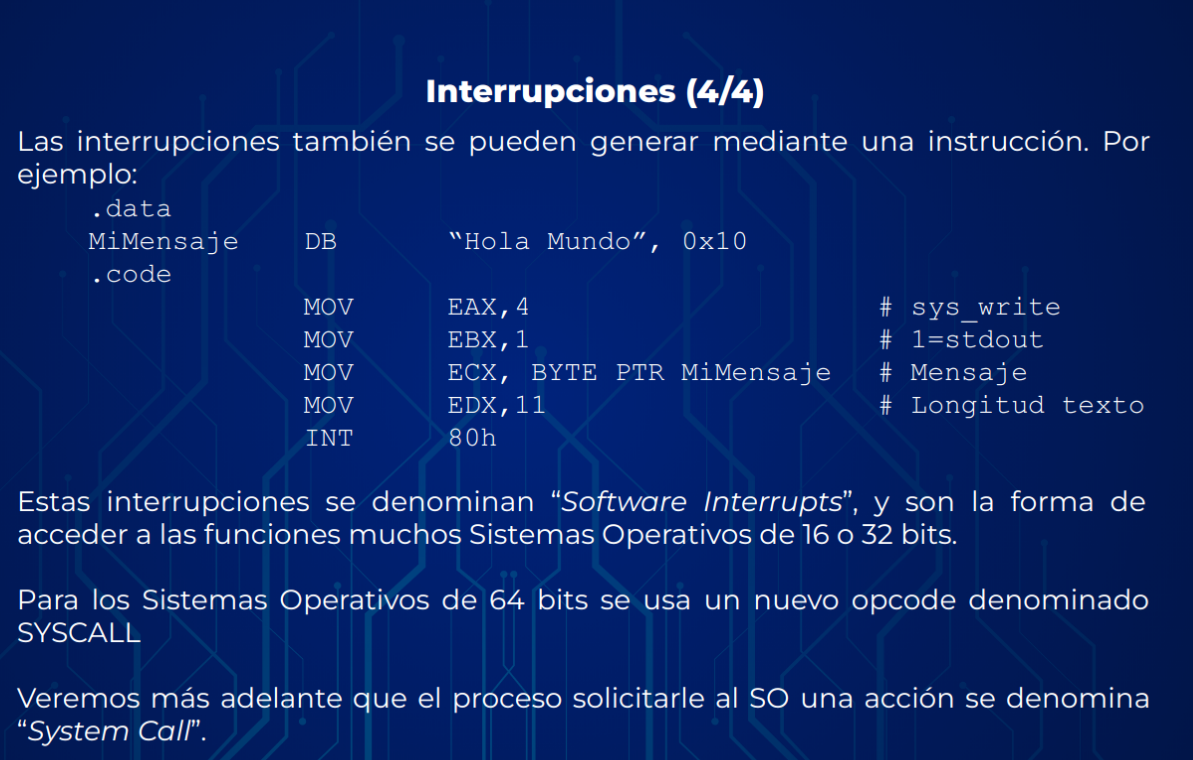

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen explica cómo las interrupciones pueden ser generadas no solo por hardware, sino también por software mediante instrucciones específicas en el código de un programa. Estas se conocen como interrupciones de software o "software interrupts". Vamos a detallar cómo funcionan y su uso en sistemas operativos.

## **Interrupciones de Software**

Las interrupciones de software son una forma de invocar servicios del sistema operativo desde un programa de usuario. Son ampliamente utilizadas en sistemas operativos de 16 o 32 bits y permiten que un programa solicite al sistema operativo realizar tareas como entrada/salida (I/O), manipulación de archivos, asignación de memoria, etc.

**Ejemplo del Código en la Imagen**

El código ensamblador proporcionado en la imagen es un ejemplo de cómo se puede utilizar una interrupción de software para imprimir un mensaje en la pantalla. Vamos a desglosar el código línea por línea:

.data: Esta sección define datos estáticos que el programa utilizará.
MiMensaje DB "Hola Mundo", 0x10: Define una cadena de texto "Hola Mundo" seguida por el carácter de nueva línea (0x10).

.code
MOV EAX, 4          ; sys_write
MOV EBX, 1          ; 1=stdout (salida estándar)
MOV ECX, BYTE PTR MiMensaje ; Dirección del mensaje a imprimir
MOV EDX, 11         ; Longitud del mensaje
INT 80h             ; Llamada al sistema para realizar la escritura

- MOV EAX, 4: Coloca el valor 4 en el registro EAX. Este valor corresponde al número de llamada del sistema para sys_write en sistemas basados en UNIX/Linux.

- MOV EBX, 1: Coloca el valor 1 en el registro EBX, que indica que el destino de la salida es la salida estándar (stdout).

- MOV ECX, BYTE PTR MiMensaje: Coloca la dirección del mensaje (MiMensaje) en el registro ECX. Este es el puntero al buffer que contiene el mensaje que se desea imprimir.

- MOV EDX, 11: Coloca el valor 11 en el registro EDX, que es la longitud del mensaje ("Hola Mundo" tiene 11 caracteres incluyendo el salto de línea).

- INT 80h: Esta es la instrucción de interrupción que invoca la llamada del sistema. 80h es el número de interrupción utilizado en Linux para hacer llamadas al sistema en modo usuario.

## **Uso de Interrupciones de Software en Sistemas Operativos**

Las interrupciones de software permiten que los programas de usuario soliciten servicios al sistema operativo de manera segura. Cuando el sistema operativo recibe una interrupción de software, transfiere el control a una rutina de servicio de interrupción (ISR) que maneja la solicitud del programa. Esto permite la abstracción de hardware y la protección del sistema operativo, asegurando que los programas de usuario no interfieran directamente con los recursos del sistema.

**Interrupciones de Software en Sistemas de 64 bits**

Para sistemas operativos de 64 bits, se utiliza un nuevo opcode denominado SYSCALL en lugar de INT 80h. SYSCALL es más eficiente y rápido, ya que está optimizado para los modos de 64 bits y reduce la sobrecarga de la transición entre el modo usuario y el modo kernel.

**System Call (Llamada al Sistema)**

Una System Call es una interfaz proporcionada por el sistema operativo que permite a los programas de usuario solicitar servicios específicos del kernel del sistema operativo. Las interrupciones de software son una forma de realizar estas llamadas al sistema, permitiendo a los programas de usuario interactuar con el hardware y otros recursos del sistema operativo de manera controlada y segura.

**Resumen**

En resumen, las interrupciones de software son esenciales para permitir la comunicación segura y controlada entre programas de usuario y el sistema operativo. Permiten que un programa solicite al sistema operativo realizar tareas específicas, como entrada/salida o manejo de archivos, sin necesidad de acceder directamente al hardware subyacente. Esto proporciona un nivel de abstracción y seguridad, crucial para el funcionamiento de sistemas operativos modernos.</div>




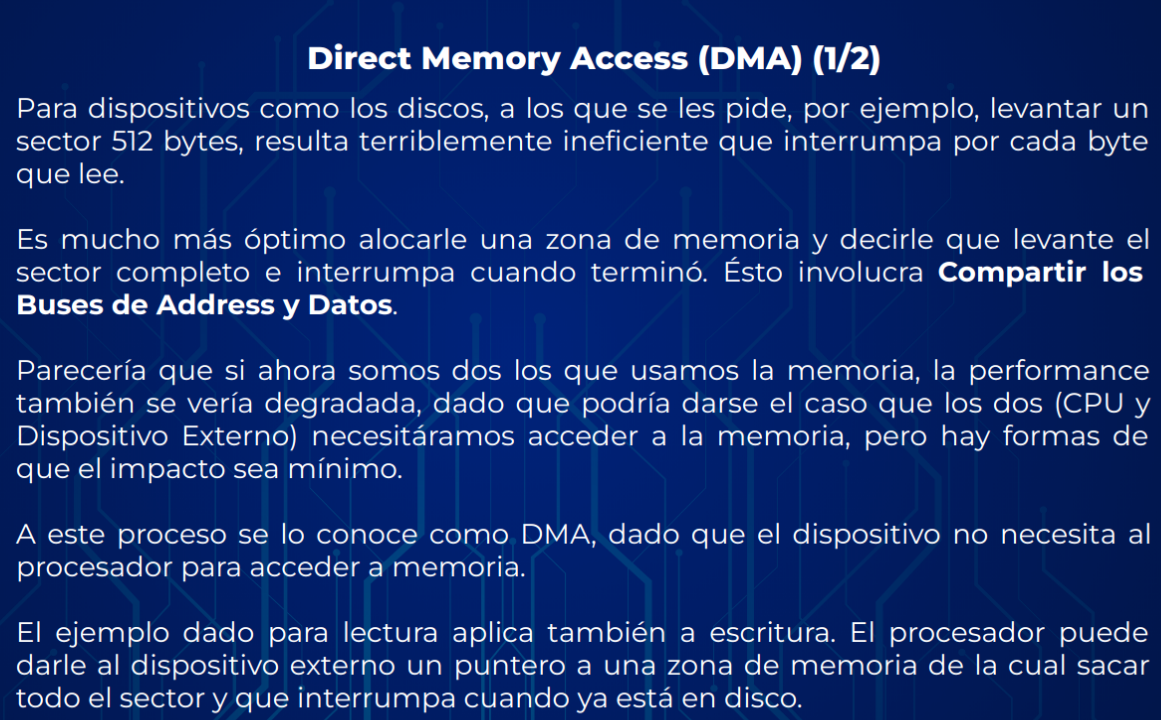

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen describe el concepto de Direct Memory Access (DMA), una técnica utilizada para mejorar la eficiencia del manejo de datos entre dispositivos de entrada/salida (E/S) como discos duros y la memoria principal del sistema (RAM), evitando la intervención continua del procesador (CPU).

## **¿Qué es el DMA (Direct Memory Access)?**

DMA es un método que permite a los dispositivos de E/S transferir datos directamente a la memoria principal sin necesidad de pasar por el procesador para cada byte transferido. Esta técnica es especialmente útil para dispositivos como discos duros, que manejan grandes cantidades de datos.

#### **Problema con el Acceso Convencional a la Memoria**

- **Acceso Convencional:** Sin DMA, el procesador debe intervenir para cada byte de datos que se transfiere entre un dispositivo de E/S y la memoria. Esto es extremadamente ineficiente, especialmente cuando se transfieren grandes bloques de datos como un sector de disco de 512 bytes o más. El procesador se sobrecarga con operaciones triviales de lectura y escritura, reduciendo el tiempo disponible para ejecutar otras tareas importantes.

#### **Solución con DMA**

- **Acceso Directo a la Memoria:** En lugar de interrumpir al procesador para cada byte transferido, el dispositivo de E/S utiliza el DMA para escribir o leer un bloque completo de datos directamente en la memoria.

    - Se le asigna una zona específica de memoria para el dispositivo de E/S.

    - El dispositivo de E/S transfiere el sector completo de datos a esta zona de memoria asignada.

    - Una vez que se completa la transferencia de datos, el dispositivo de E/S genera una interrupción para notificar al procesador que la operación ha terminado. Esto minimiza el número de interrupciones y libera al procesador para otras tareas.

#### **Ventajas del DMA**

1- **Eficiencia:** La transferencia de datos por DMA es mucho más eficiente porque reduce la cantidad de intervenciones del procesador, permitiéndole enfocarse en otras tareas en lugar de manejar directamente cada transferencia de datos.

2- **Compartición del Bus de Direcciones y Datos:** El DMA involucra compartir el bus de direcciones y el bus de datos entre el procesador y los dispositivos de E/S. Esto significa que mientras el dispositivo está utilizando el bus para transferir datos a la memoria, el procesador puede estar inactivo o ejecutando otras instrucciones que no requieren acceso al bus de memoria.

#### **Consideraciones de Rendimiento**

- **Impacto Mínimo en el Rendimiento:** Aunque tanto el procesador como el dispositivo de E/S pueden necesitar acceso a la memoria simultáneamente, existen métodos para minimizar el impacto en el rendimiento:

    - Arbitraje del Bus: El sistema puede implementar un esquema de arbitraje del bus para decidir cuándo el procesador o el DMA pueden acceder al bus de memoria, asegurando que ambos no entren en conflicto.

    - Operaciones de Burst y Ciclos Robados: El DMA puede utilizar técnicas como operaciones de burst para transferir grandes bloques de datos de una sola vez, o ciclos robados donde el DMA toma el control del bus solo durante breves periodos, permitiendo que el procesador retenga el control la mayor parte del tiempo.

#### **Aplicaciones de DMA**

- Lectura y Escritura: El ejemplo proporcionado en la imagen se aplica tanto a operaciones de lectura como de escritura. El procesador puede establecer un puntero en la memoria para el dispositivo de E/S desde donde los datos serán leídos o hacia donde serán escritos.

- Transferencias de Disco a Memoria: Un caso típico es la transferencia de datos desde un disco duro a la memoria. El procesador solo establece el puntero y el tamaño del bloque y el DMA se encarga del resto.

**Resumen**

Direct Memory Access (DMA) es una técnica crucial para optimizar la transferencia de datos entre dispositivos de E/S y la memoria del sistema, reduciendo la sobrecarga del procesador y mejorando la eficiencia general del sistema. DMA permite que los dispositivos realicen transferencias de datos masivas con un mínimo de intervención del procesador, lo cual es especialmente beneficioso en sistemas que manejan grandes volúmenes de datos o requieren operaciones de alta velocidad.
</div>

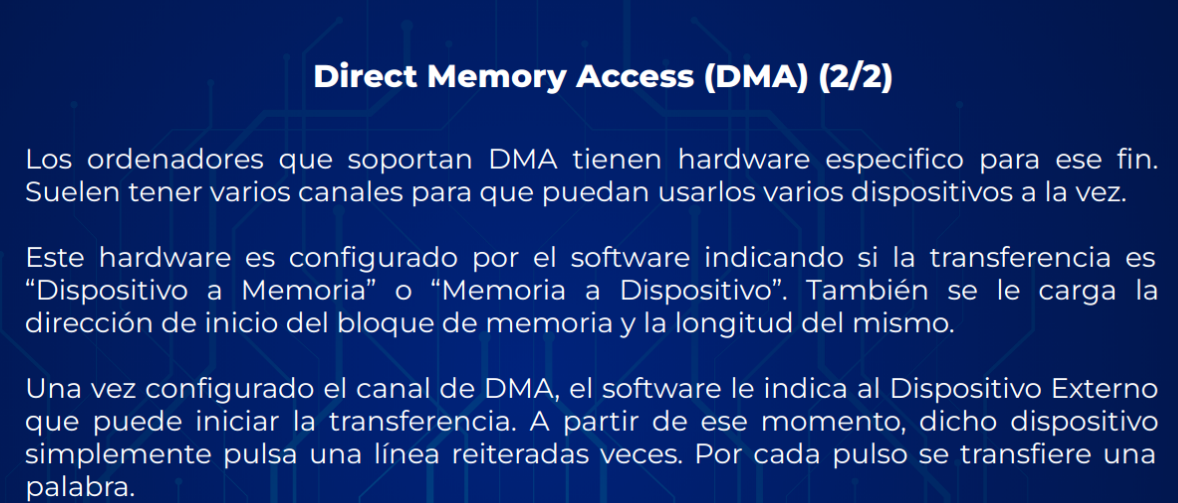

<div style="font-family: 'Source Code Pro'; font-size: 24px;">

La imagen amplía la explicación del Direct Memory Access (DMA), describiendo cómo funciona el hardware de soporte de DMA en los sistemas y cómo se configuran las transferencias de datos entre dispositivos de E/S y la memoria.

#### **Hardware de Soporte para DMA**

Los sistemas que soportan DMA tienen un hardware especializado que facilita esta operación. Este hardware permite que varios dispositivos usen DMA simultáneamente mediante múltiples canales de DMA. Cada canal puede ser asignado a un dispositivo diferente para manejar transferencias de datos.

#### **Configuración de DMA**

El proceso de configuración del DMA involucra varios pasos clave:

1- Dirección de Transferencia:

- El software del sistema (normalmente el controlador del dispositivo) configura el hardware de DMA indicando si la transferencia será de "Dispositivo a Memoria" o de "Memoria a Dispositivo".

- Además, se especifica la dirección de inicio del bloque de memoria al que se transferirán los datos o desde el cual se leerán los datos. Esto es crucial porque le indica al hardware de DMA dónde empezar a leer o escribir en la memoria.

2- Longitud del Bloque de Memoria:

- También se configura la longitud del bloque de memoria, es decir, cuántos bytes o palabras deben transferirse en una sola operación de DMA. Esto permite que el hardware de DMA gestione adecuadamente el tamaño de las transferencias y sepa cuándo ha completado una operación.

#### **Proceso de Transferencia con DMA**

Una vez que se ha configurado el canal de DMA:

1- Inicio de la Transferencia:

- El software le indica al dispositivo externo que puede iniciar la transferencia de datos. Esto se hace después de que se han configurado correctamente todos los parámetros de la transferencia de DMA.

2- Transferencia de Datos:

- Desde este punto, el dispositivo externo utiliza el hardware de DMA para transferir los datos directamente a la memoria o desde la memoria.

- El hardware de DMA realiza esta transferencia "pulsando" una línea de control repetidamente. Cada pulso o ciclo de reloj representa una palabra (unidad de datos) que se transfiere.

- Este método es muy eficiente porque el DMA gestiona la transferencia sin necesidad de intervención continua del procesador, liberando la CPU para realizar otras tareas.

#### **Ventajas de Usar DMA con Múltiples Canales**

- Soporte para Múltiples Dispositivos: Con varios canales DMA, diferentes dispositivos pueden realizar transferencias simultáneamente, mejorando el rendimiento general del sistema. Por ejemplo, un disco duro podría estar transfiriendo datos a la memoria mientras que una tarjeta de red hace lo mismo a través de otro canal DMA.

- Reducción de Carga en la CPU: La CPU solo necesita configurar la transferencia de DMA y luego es libre de realizar otras tareas, mejorando la eficiencia del procesamiento en general.

**Resumen**

El Direct Memory Access (DMA) es una técnica fundamental para mejorar la eficiencia del manejo de datos entre dispositivos de E/S y la memoria del sistema, especialmente en sistemas con múltiples dispositivos que requieren un acceso rápido y directo a la memoria. El uso de hardware especializado y múltiples canales de DMA permite que estas transferencias se realicen de manera simultánea y sin la intervención constante del procesador, maximizando el rendimiento del sistema y minimizando el tiempo de inactividad de la CPU.